# Notebook for Plots of RA vs DEC with Absolute Magnitude as Colourmap

### Import and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1] # 13,299
df = df[df['FKs'] > 0] # 12,676

mag_lim = 27
redshift_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
sigma_limit = 1 # SNR must be greater than this value

### Absolute Magnitude

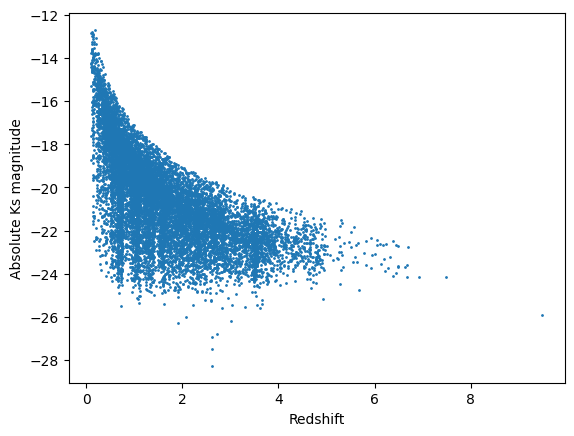

In [2]:
z = df['zpk'] # redshift
mag_app = df['FKs'] # apparent magnitude

mag_ab = 25 - 2.5*np.log10(mag_app) # apparent magnitude -> AB magnitude

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dists = cosmo.luminosity_distance(z) # Mpc
dists *= 10 ** 6 # Mpc -> pc
Mag_abs = mag_ab - 5 * np.log10(dists / 10) # AB magnitude -> absolute magnitude

mask = (mag_ab <= mag_lim)

plt.scatter(z[mask], Mag_abs[mask], s=1)
plt.xlabel('Redshift')
plt.ylabel('Absolute Ks magnitude')
plt.show()

### RA vs DEC with Absolute Magnitude Colourmap

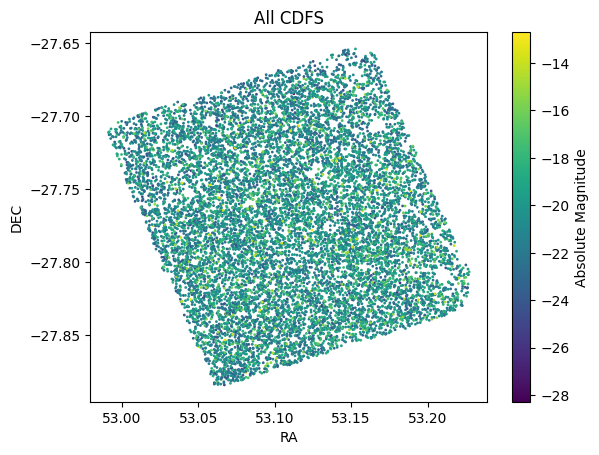

In [3]:
ra = df['RAJ2000'] # Right Ascension
dec = df['DEJ2000'] # Declination

Mag_abs = Mag_abs[mask]
ra = ra[mask]
dec = dec[mask]

plt.scatter(ra, dec, s=1, c=Mag_abs, cmap='viridis')
plt.title('All CDFS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar(label='Absolute Magnitude')
plt.show()

### RA vs DEC with Absolute Magnitude Colourmap at Different Redshift Slices

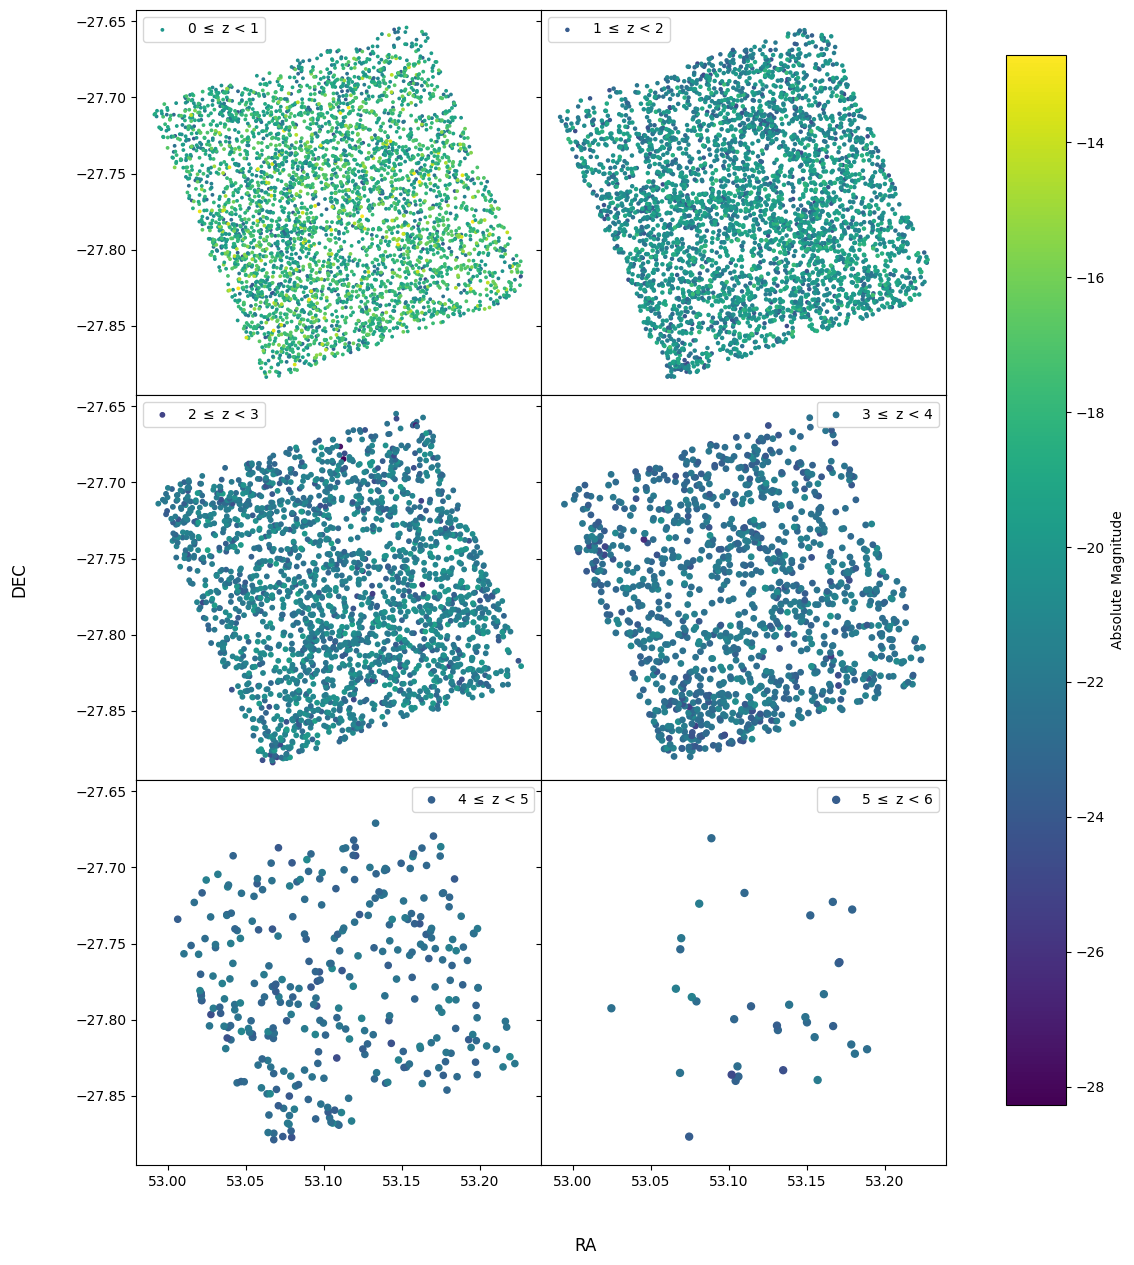

In [4]:
size = [3, 5, 10, 15, 20, 25]

fig, axes = plt.subplots(3, 2, figsize=(12, 15), sharex=True, sharey=True)
for i, (ax, (zmin, zmax)) in enumerate(zip(axes.flatten(), redshift_bins)):
    mask = (z >= zmin) & (z < zmax)
    pcm = ax.scatter(ra[mask], dec[mask], s=size[i], c=Mag_abs[mask], cmap='viridis', label=f'{zmin} $\leq$ z < {zmax}', vmin=Mag_abs.min(), vmax=Mag_abs.max())
    ax.legend()

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(pcm, cax=cbar_ax, label='Absolute Magnitude')
fig.subplots_adjust(hspace=0, wspace=0, right=0.8)
fig.supxlabel('RA', y=0.05)
fig.supylabel('DEC')
plt.show()

### Ensuring all Bands Meet Minimum Sigma Limit

In [5]:
mask = (mag_ab <= mag_lim)
SNR_36 = df['F3.6'] / df['e_F3.6']
SNR_45 = df['F4.5'] / df['e_F4.5']
SNR_58 = df['F5.8'] / df['e_F5.8']
SNR_80 = df['F8.0'] / df['e_F8.0']
SNR_24 = df['F24'] / df['e_F24']

SNR_36_mask = (SNR_36 >= sigma_limit)
SNR_45_mask = (SNR_45 >= sigma_limit)
SNR_58_mask = (SNR_58 >= sigma_limit)
SNR_80_mask = (SNR_80 >= sigma_limit)
SNR_24_mask = (SNR_24 >= sigma_limit)

df = df[mask & SNR_36_mask & SNR_45_mask & SNR_58_mask & SNR_80_mask & SNR_24_mask]

### Absolute Magnitude

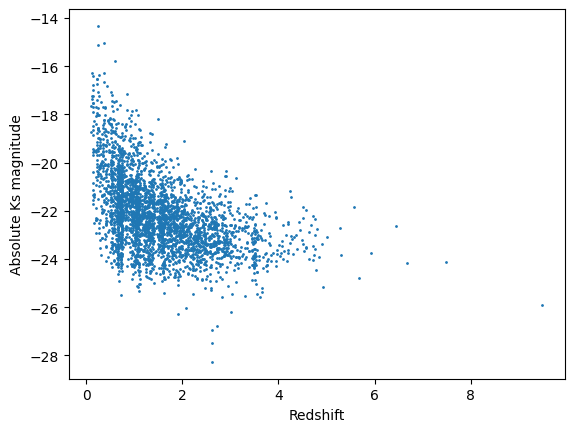

In [6]:
z = df['zpk'] # redshift
mag_app = df['FKs'] # apparent magnitude

mag_ab = 25 - 2.5*np.log10(mag_app) # apparent magnitude -> AB magnitude

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dists = cosmo.luminosity_distance(z) # Mpc
dists *= 10 ** 6 # Mpc -> pc
Mag_abs = mag_ab - 5 * np.log10(dists / 10) # AB magnitude -> absolute magnitude

mask = (mag_ab <= mag_lim)

plt.scatter(z[mask], Mag_abs[mask], s=1)
plt.xlabel('Redshift')
plt.ylabel('Absolute Ks magnitude')
plt.show()

### RA vs DEC with Absolute Magnitude Colourmap

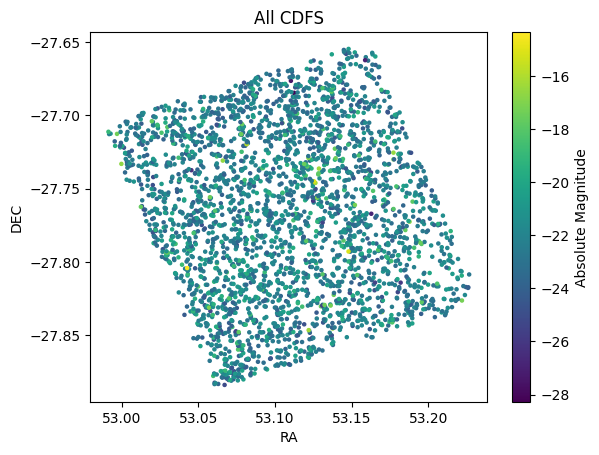

In [7]:
ra = df['RAJ2000'] # Right Ascension
dec = df['DEJ2000'] # Declination

Mag_abs = Mag_abs[mask]
ra = ra[mask]
dec = dec[mask]

plt.scatter(ra, dec, s=5, c=Mag_abs, cmap='viridis')
plt.title('All CDFS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar(label='Absolute Magnitude')
plt.show()

### RA vs DEC with Absolute Magnitude Colourmap at Different Redshift Slices

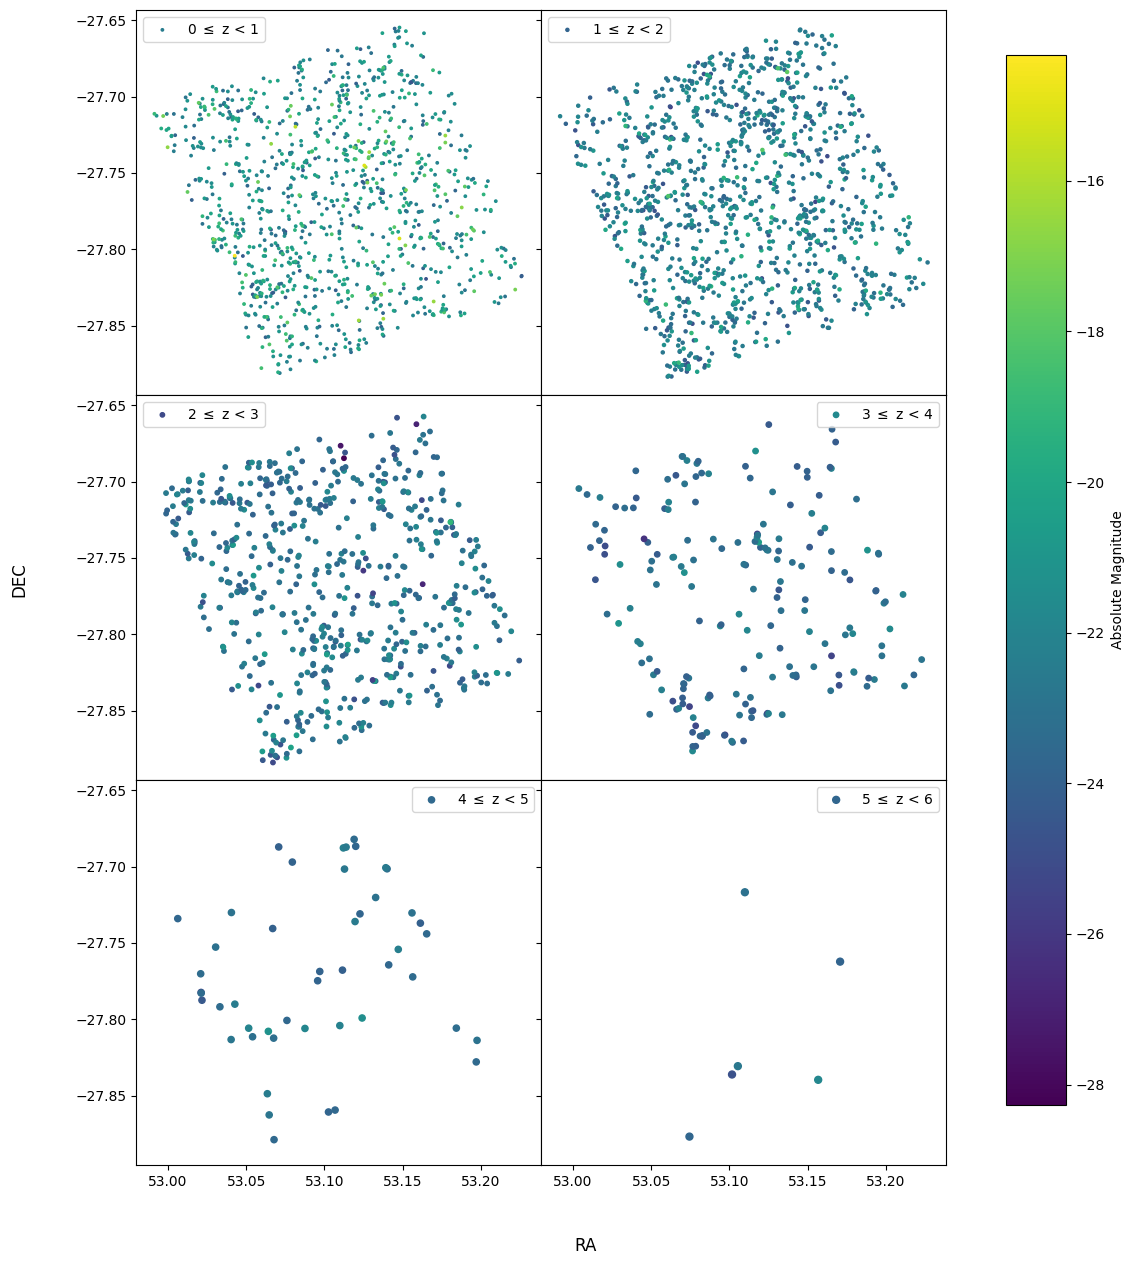

In [8]:
size = [3, 5, 10, 15, 20, 25]

fig, axes = plt.subplots(3, 2, figsize=(12, 15), sharex=True, sharey=True)
for i, (ax, (zmin, zmax)) in enumerate(zip(axes.flatten(), redshift_bins)):
    mask = (z >= zmin) & (z < zmax)
    pcm = ax.scatter(ra[mask], dec[mask], s=size[i], c=Mag_abs[mask], cmap='viridis', label=f'{zmin} $\leq$ z < {zmax}', vmin=Mag_abs.min(), vmax=Mag_abs.max())
    ax.legend()

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(pcm, cax=cbar_ax, label='Absolute Magnitude')
fig.subplots_adjust(hspace=0, wspace=0, right=0.8)
fig.supxlabel('RA', y=0.05)
fig.supylabel('DEC')
plt.show()